In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [6]:
X_train[0].shape #each pick is 28 by 28 pixelspl

(28, 28)

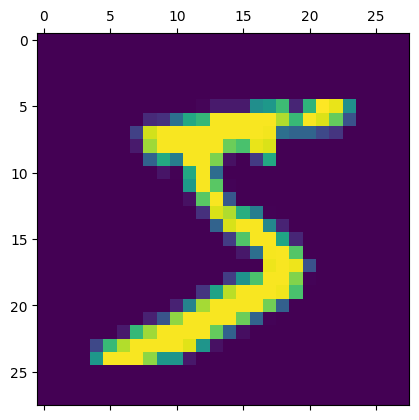

In [7]:
plt.matshow(X_train[0]) #how to see image in matplotlib

In [10]:
y_train[0]#corresponding images output

5

In [19]:
X_train = X_train/255
X_test = X_test/255  #scaling improves accuracy

In [20]:
#now we will convert 28x28 image into 1d array - flatten

In [26]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [22]:
print(X_train_flattened.shape)

(60000, 784)


In [23]:
#creating a neural network

In [40]:
model = keras.Sequential([
    keras.layers.Dense(101, input_shape = (784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1256 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0222 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

In [25]:
#checking model accuracy on test dataset

In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.9247


[0.2681792378425598, 0.9247000217437744]

In [29]:
y_predict = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [30]:
print(y_predict[0])

[4.4623134e-03 1.8130189e-08 1.6421730e-02 9.7122663e-01 1.9925674e-03
 1.5637098e-01 5.5363518e-08 9.9983132e-01 8.1393868e-02 7.0752108e-01]


In [32]:
np.argmax(y_predict[0]) #matching our results

7

In [33]:
ylabel_pre = [np.argmax(i) for i in y_predict]
print(ylabel_pre)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 3, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [38]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = ylabel_pre)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    7,    6,    3,    1,    0],
       [   0, 1108,    3,    2,    0,    1,    5,    2,   14,    0],
       [   4,    8,  922,   15,   10,    6,   14,   10,   40,    3],
       [   3,    0,   18,  921,    1,   25,    2,   10,   24,    6],
       [   1,    1,    4,    2,  931,    0,    9,    5,    8,   21],
       [   7,    2,    2,   36,   11,  782,   13,    9,   26,    4],
       [  10,    3,    8,    1,    8,   15,  910,    1,    2,    0],
       [   1,    6,   23,    5,    9,    1,    0,  955,    2,   26],
       [   6,    6,    6,   22,    9,   29,    9,   12,  868,    7],
       [  11,    6,    1,   10,   47,    8,    0,   30,    6,  890]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

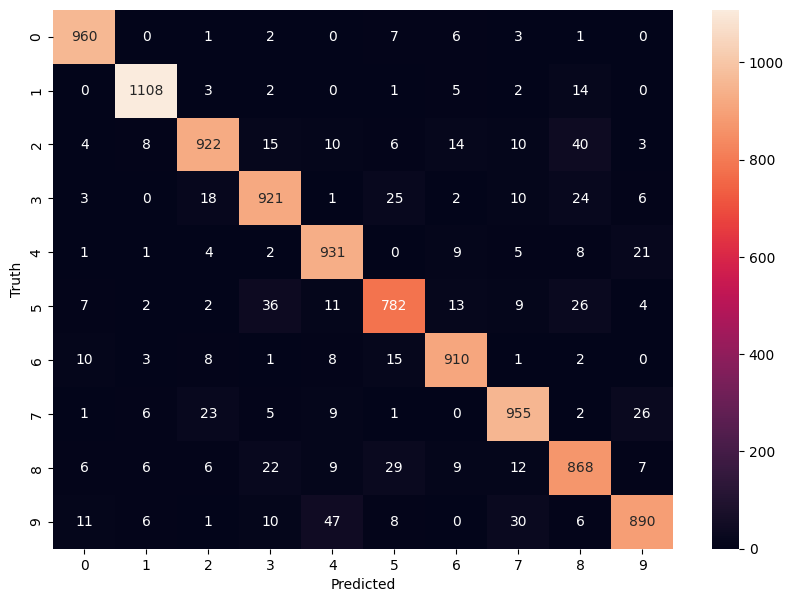

In [39]:
 import seaborn as sn
 plt.figure(figsize = (10, 7))
 sn.heatmap(cm, annot = True, fmt = 'd')
 plt.xlabel('Predicted')
 plt.ylabel('Truth')